In [1]:
import pandas as pd
df = pd.read_csv("prefecture_population.csv", skiprows=14)
df.head()

,時間軸（年次） コード,時間軸（年次） 補助コード,時間軸（年次）,全国，都道府県，市区町村（2000年市区町村含む） コード,全国，都道府県，市区町村（2000年市区町村含む） 補助コード,全国，都道府県，市区町村（2000年市区町村含む）,/男女,総数,男,女
0,2020000000,NaN,2020年,00000,NaN,全国,NaN,"126,146,099","61,349,581","64,796,518"
1,2020000000,NaN,2020年,01000,NaN,北海道,NaN,"5,224,614","2,465,088","2,759,526"
2,2020000000,NaN,2020年,01100,NaN,札幌市,NaN,"1,973,395","918,682","1,054,713"
3,2020000000,NaN,2020年,01101,NaN,札幌市中央区,NaN,"248,680","112,853","135,827"
4,2020000000,NaN,2020年,01102,NaN,札幌市北区,NaN,"289,323","136,596","152,727"


In [2]:
df.shape

(4086, 10)

In [3]:
# 必要な列名をリストで用意する
use_cols = [
    "時間軸（年次）",
    "全国，都道府県，市区町村（2000年市区町村含む） コード",
    "全国，都道府県，市区町村（2000年市区町村含む）",
    "総数",
    "男",
    "女"
]

# その列だけを取り出した新しいDataFrameを作成
df_use = df[use_cols].copy()
# 中身を確認
df_use.head()

,時間軸（年次）,全国，都道府県，市区町村（2000年市区町村含む） コード,全国，都道府県，市区町村（2000年市区町村含む）,総数,男,女
0,2020年,00000,全国,"126,146,099","61,349,581","64,796,518"
1,2020年,01000,北海道,"5,224,614","2,465,088","2,759,526"
2,2020年,01100,札幌市,"1,973,395","918,682","1,054,713"
3,2020年,01101,札幌市中央区,"248,680","112,853","135,827"
4,2020年,01102,札幌市北区,"289,323","136,596","152,727"


In [ ]:
# 文字列型の数値を計算可能な数値に変換
for col in ["総数", "男", "女"]:
    s = df_use[col].astype(str)
    s = s.str.replace(",", "", regex=False)
    s = s.str.replace("+", "", regex=False)
    df_use[col] = pd.to_numeric(s, errors="coerce")

    df_use.dtypes

In [6]:
code_col = "全国，都道府県，市区町村（2000年市区町村含む） コード"
name_col = "全国，都道府県，市区町村（2000年市区町村含む）"

# 都道府県別の分析をするために新しくDataFrameを作成
df_pref = df_use[
    df_use[code_col].str.endswith("000") &
    (df_use[code_col] != "00000")
].copy()

# 確認
df_pref.head()
df_pref.shape

(47, 6)

In [7]:
# 列名の変更
df_pref = df_pref.rename(columns={
    "全国，都道府県，市区町村（2000年市区町村含む） コード": "都道府県コード",
    "全国，都道府県，市区町村（2000年市区町村含む）": "都道府県名"
})
df_pref.columns

name_col = "都道府県名"
df_pref["総数"] = df_pref["総数"].astype(int)

# 人口が多い順に並び替え
df_pref_rank = df_pref.sort_values("総数", ascending=False)

# 上位・下位10位の抽出と表示
# 人口が多い都道府県 上位10位
top10 = df_pref_rank[[name_col, "総数"]].head(10).reset_index(drop=True)
print("【人口が多い都道府県 上位10】")
print(top10)
print("")

# 人口が少ない都道府県 下位10位
bottom10 = df_pref_rank[[name_col, "総数"]].tail(10).sort_values("総数").reset_index(drop=True)
print("【人口が少ない都道府県 下位10】")
print(bottom10)


【人口が多い都道府県 上位10】
  都道府県名        総数
0   東京都  14047594
1  神奈川県   9237337
2   大阪府   8837685
3   愛知県   7542415
4   埼玉県   7344765
5   千葉県   6284480
6   兵庫県   5465002
7   北海道   5224614
8   福岡県   5135214
9   静岡県   3633202

【人口が少ない都道府県 下位10】
  都道府県名      総数
0   鳥取県  553407
1   島根県  671126
2   高知県  691527
3   徳島県  719559
4   福井県  766863
5   山梨県  809974
6   佐賀県  811442
7  和歌山県  922584
8   香川県  950244
9   秋田県  959502


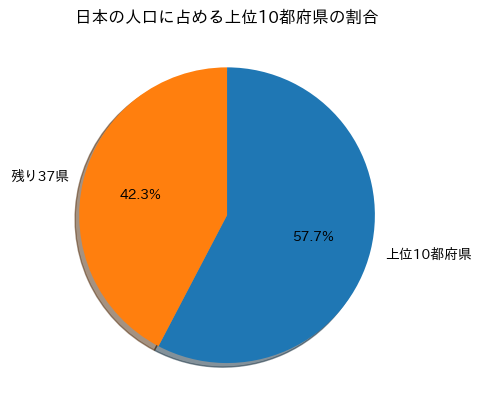

In [9]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# グラフ作成用のデータ集計
# 上位10都府県の人口合計を計算
top10_sum = top10["総数"].sum()
# 日本全体の人口から上位10を引いて、残り37県の合計を計算
other_sum = df_pref["総数"].sum() - top10_sum

# グラフに表示するラベルとデータのリスト化
labels = ["上位10都府県", "残り37県"]
x = [top10_sum, other_sum]

# 円グラフの描画
fig, ax = plt.subplots()
ax.pie(
    x,
    labels=labels,
    shadow=True,
    startangle=90,
    counterclock=False,
    autopct="%1.1f%%"
)

# グラフにタイトルを設定
ax.set_title("日本の人口に占める上位10都府県の割合")
# グラフを表示
plt.show()


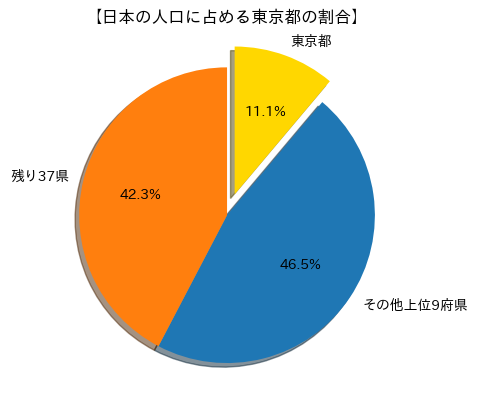

In [11]:
# 比較対象のデータを更に細分化
# 東京都の人口だけを抽出
tokyo_pop = df_pref[df_pref["都道府県名"] == "東京都"]["総数"].values[0]
# 上位10都府県のうち、東京以外の人口
other_top10 = top10["総数"].sum() - tokyo_pop
# 残り37県の人口
remaining_37_pop = df_pref["総数"].sum() - top10["総数"].sum()

# グラフ用のラベルとデータのリスト化
labels = ["東京都", "その他上位9府県", "残り37県"]
x = [tokyo_pop, other_top10, remaining_37_pop]

# 東京都のピースだけを外側に飛び出させる
explode = [0.15, 0, 0]
colors = ["gold", "tab:blue", "tab:orange"]

# グラフの描画
fig, ax = plt.subplots()
ax.pie(
    x,
    startangle=90,
    counterclock=False,
    autopct="%1.1f%%",
    shadow=True,
    explode=explode,
    labels=labels,
    colors=colors
)

# グラフにタイトルを設定
ax.set_title("【日本の人口に占める東京都の割合】")
# グラフを表示
plt.show()

In [12]:
# 男女比の計算
# 女性100認に対する男性の人数を計算
df_pref["男女比"] = (df_pref["男"] / df_pref["女"]) * 100

# 男性の割合が高い都道府県 TOP5（男女比が大きい順）
male_top5 = df_pref.sort_values("男女比", ascending=False).head(5)
# 女性の割合が高い都道府県 TOP5（男女比が小さい順）
female_top5 = df_pref.sort_values("男女比", ascending=True).head(5)
# 数値を小数点第1位までの文字列にフォーマット
male_top5["男女比"] = male_top5["男女比"].map('{:.1f}'.format)
female_top5["男女比"] = female_top5["男女比"].map('{:.1f}'.format)

print("【男性の割合が高い県 TOP5】")
print(male_top5[["都道府県名", "男女比"]])
print("")

print("【女性の割合が高い都道府県 TOP5】")
print(female_top5[["都道府県名", "男女比"]])


【男性の割合が高い県 TOP5】
     都道府県名   男女比
841    栃木県  99.7
729    茨城県  99.6
2065   愛知県  99.5
989    埼玉県  98.9
1277  神奈川県  98.7

【女性の割合が高い都道府県 TOP5】
     都道府県名   男女比
3574   長崎県  88.7
2593   奈良県  89.1
3907  鹿児島県  89.1
248    青森県  89.1
493    秋田県  89.2


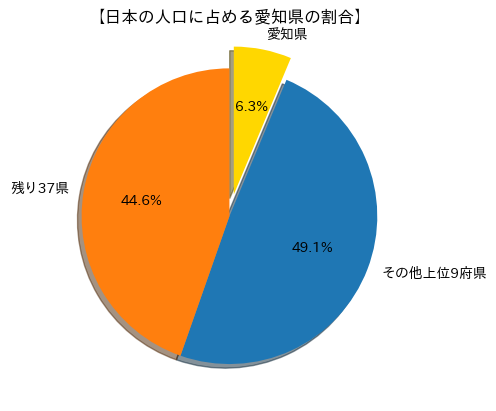

In [20]:
# 愛知県の人口だけを抽出
aichi_pop = df_pref[df_pref["都道府県名"] == "愛知県"]["総数"].values[0]
# 上位10都府県のうち、愛知県意外の人口
other_top10_aichi = top10["総数"].sum() - aichi_pop

# グラフ用のラベルとデータ
labels = ["愛知県", "その他上位9府県", "残り37県"]
x = [aichi_pop, other_top10, remaining_37_pop]

# 愛知県のピースだけを外側に飛び出させる
explode = [0.15, 0, 0]
colors = ["gold", "tab:blue", "tab:orange"]

# グラフの描画
fig, ax = plt.subplots()
ax.pie(
    x,
    startangle=90,
    counterclock=False,
    autopct="%1.1f%%",
    shadow=True,
    explode=explode,
    labels=labels,
    colors=colors
)

# グラフタイトルの設定
ax.set_title("【日本の人口に占める愛知県の割合】")
# グラフを表示
plt.show()

In [23]:
# 全国平均の男女比
japan_avg = (df_pref["男"].sum() / df_pref["女"].sum()) * 100

# 東京都の男女比
tokyo = df_pref[df_pref["都道府県名"] == "東京都"].iloc[0]
tokyo_ratio = (tokyo["男"] / tokyo["女"]) * 100

# 愛知県の男女比
aichi = df_pref[df_pref["都道府県名"] == "愛知県"].iloc[0]
aichi_ratio = (aichi["男"] / aichi["女"]) * 100

# 愛知県、東京都、全国の男女比の比較
print("【男女比の比較】")
print(f"日本全国の平均：{japan_avg:.1f}")
print(f"東京都の男女比：{tokyo_ratio:.1f}")
print(f"愛知県の男女比：{aichi_ratio:.1f}")

【男女比の比較】
日本全国の平均：94.7
東京都の男女比：96.5
愛知県の男女比：99.5
